Analyzing survey data with unsupervised machine learning approach:

1. Difference between conventional and machine learning approach lies in their understanding of values (absolute versus relative positioning: think about the height of Asians and North Europeans);
2. Theory-driven method may ignore the existnence of borderline cases, especially in scatter-plot of survey data.  

In [4]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('/Users/kaiyang/Desktop/WV7_Data.csv')
df.head() 

/var/folders/rr/q2hphpp53sg6tswwk64tz_tw0000gn/T/ipykernel_9393/2700596155.py:1: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/kaiyang/Desktop/WV7_Data.csv')


,version,doi,A_WAVE,A_YEAR,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,...,WVS_Polmistrust_PartyVoter,WVS_LR_MedianVoter,WVS_LibCon_MedianVoter,v2psbars,v2psorgs,v2psprbrch,v2psprlnks,v2psplats,v2xnp_client,v2xps_party
0,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2018,2,20,AND,232,AND,20070001,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2018,2,20,AND,232,AND,20070002,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2018,2,20,AND,232,AND,20070003,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2018,2,20,AND,232,AND,20070004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2018,2,20,AND,232,AND,20070005,...,66.964286,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [8]:
# Selection of multiples rows with conditions: Hong Kong
df_HK = df[df['B_COUNTRY']==344]
df_HK.head()

,version,doi,A_WAVE,A_YEAR,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,...,WVS_Polmistrust_PartyVoter,WVS_LR_MedianVoter,WVS_LibCon_MedianVoter,v2psbars,v2psorgs,v2psprbrch,v2psprlnks,v2psplats,v2xnp_client,v2xps_party
30656,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2018,2,344,HKG,714,HKG,344070001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30657,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2018,2,344,HKG,714,HKG,344070002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30658,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2018,2,344,HKG,714,HKG,344070003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30659,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2018,2,344,HKG,714,HKG,344070004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30660,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2018,2,344,HKG,714,HKG,344070005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Selecting multiple columns/variables measuring public confidence in political institutions in Hong Kong
# Q71: confidence in government; Q73: confidence in parliament

trust_HK = df_HK[['Q71','Q73']]

print(trust_HK.shape)

trust_HK.head()

(2075, 2)


,Q71,Q73
30656,2,3
30657,4,4
30658,2,3
30659,4,4
30660,2,2


In [12]:
# Define a list of values to be treated as missing
missing_values = [-1,-2,-3,-5] 

# Replace specified values with NaN
trust_HK.replace(missing_values, np.nan, inplace=True)

# check if there are any missing values in the two variables
trust_HK.isnull().mean() * 100

/var/folders/rr/q2hphpp53sg6tswwk64tz_tw0000gn/T/ipykernel_9393/2522834724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trust_HK.replace(missing_values, np.nan, inplace=True)


Q71    0.289157
Q73    1.253012
dtype: float64

In [14]:
# drop rows with missing values in the two variables

trust_HK = trust_HK.dropna(subset=['Q71', 'Q73'])
trust_HK.shape

(2049, 2)

Notes on the original survey items: I am going to name a number of organizations. For each one, could you tell me how much confidence you have in them: is it a great deal of confidence(1), quite a lot of confidence(2), not very much confidence (3) or none at all (4)? 

In [17]:
trust_HK['gov'] = trust_HK['Q71'].replace({1: 4, 2:3, 3: 2, 4: 1})     # np.where(df_world['defense_priority'] == 2, 1, 0)
trust_HK['parli'] = trust_HK['Q73'].replace({1: 4, 2:3, 3: 2, 4: 1})

### 1. Making typologies of trust with tranditional methods (theory-driven) 

In [20]:
# If you do not recode, you have 4*4 types of citizens 
# If you recode into hign-low dummy varaibles for both variables, you get a 2*2 table of citizens 

trust_HK['gov_dummy'] = trust_HK['gov'].replace({1: 0, 2:0, 3: 1, 4: 1})     # np.where(df_world['defense_priority'] == 2, 1, 0)
trust_HK['parli_dummy'] = trust_HK['parli'].replace({1: 0, 2:0, 3: 1, 4: 1})

trust_HK.head()

,Q71,Q73,gov,parli,gov_dummy,parli_dummy
30656,2.0,3.0,3.0,2.0,1.0,0.0
30657,4.0,4.0,1.0,1.0,0.0,0.0
30658,2.0,3.0,3.0,2.0,1.0,0.0
30659,4.0,4.0,1.0,1.0,0.0,0.0
30660,2.0,2.0,3.0,3.0,1.0,1.0


In [22]:
# Create a new column C with default value 'low'
trust_HK['political_trust'] = 1

# Set value of C to 'highA' when A is 1 and B is 0
trust_HK.loc[(trust_HK['gov_dummy'] == 1) & (trust_HK['parli_dummy'] == 0), 'political_trust'] = 2

# Set value of C to 'highB' when A is 0 and B is 1
trust_HK.loc[(trust_HK['gov_dummy'] == 0) & (trust_HK['parli_dummy'] == 1), 'political_trust'] = 3

# Set value of C to 'high' when both A and B are 1
trust_HK.loc[(trust_HK['gov_dummy'] == 1) & (trust_HK['parli_dummy'] == 1), 'political_trust'] = 4

trust_HK.head()

,Q71,Q73,gov,parli,gov_dummy,parli_dummy,political_trust
30656,2.0,3.0,3.0,2.0,1.0,0.0,2
30657,4.0,4.0,1.0,1.0,0.0,0.0,1
30658,2.0,3.0,3.0,2.0,1.0,0.0,2
30659,4.0,4.0,1.0,1.0,0.0,0.0,1
30660,2.0,2.0,3.0,3.0,1.0,1.0,4


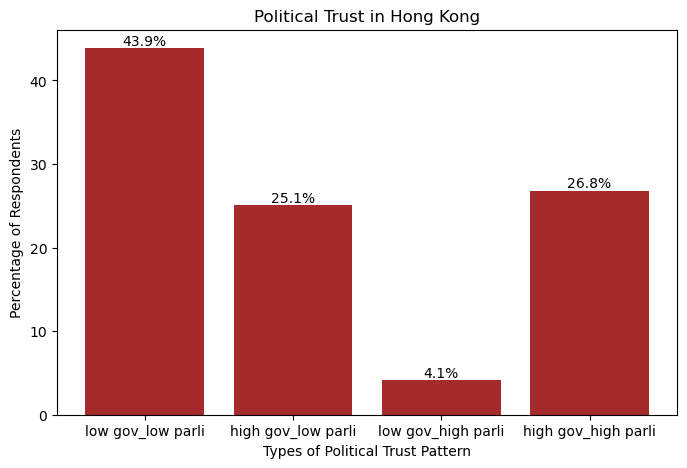

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Create a dictionary to map values to their corresponding meanings
mapping = {1: 'low gov_low parli', 2: 'high gov_low parli', 
           3: 'low gov_high parli', 4: 'high gov_high parli'}
order = ['low gov_low parli', 'high gov_low parli', 
         'low gov_high parli', 'high gov_high parli']

# Replace values in the 'political_trust' column
HK = trust_HK['political_trust'].replace(mapping)

# Get value counts and percentages
value_counts_HK = HK.value_counts()
percentages_HK = round(value_counts_HK / len(HK) * 100, 1)

# Ensure the order is consistent and missing categories are filled with 0
percentages_HK = percentages_HK.reindex(order, fill_value=0)

# Create figure and axis
fig, axs = plt.subplots(1, 1, figsize=(8, 5))  # Ensure axs is defined

# Plot bar chart
axs.bar(order, percentages_HK, color='brown')

# Set labels and title
axs.set_title('Political Trust in Hong Kong')
axs.set_xlabel('Types of Political Trust Pattern')
axs.set_ylabel('Percentage of Respondents')

# Add percentage labels to bars
axs.bar_label(axs.containers[0], labels=percentages_HK.astype(str) + '%', label_type='edge')

# Show the plot
plt.show()

### 2. Making typologies of trust with unsupervised machine learning (data-driven) 

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [28]:
X = trust_HK[['gov', 'parli']]

# standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

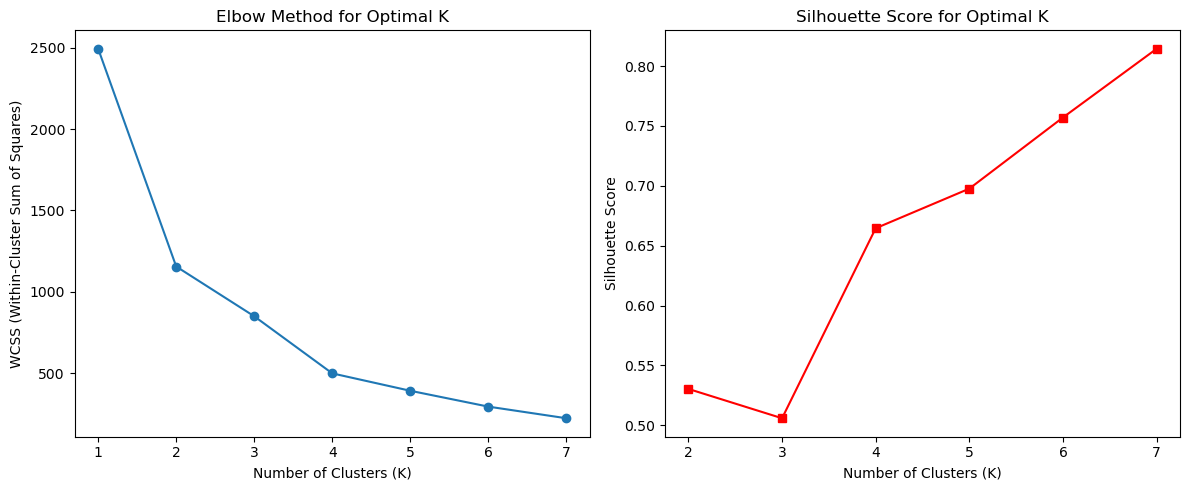

In [31]:
wcss = []  # Within-cluster sum of squares
silhouette_scores = []  # Silhouette scores
K_range = range(1, 8)  # Testing K values from 1 to 7

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Store WCSS for each k

    # Compute silhouette score only for k >= 2
    if k > 1:
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)

# Plot Elbow Method (WCSS)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range[1:], silhouette_scores, marker='s', linestyle='-', color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')

plt.tight_layout()
plt.show()

In [32]:
best_k = 4  # Replace with the optimal K found earlier
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=5)

# Fit KMeans and assign clusters
trust_HK['Cluster'] = kmeans.fit_predict(X)

# Retrieve centroids
centroids = kmeans.cluster_centers_

# Convert centroids into a DataFrame for better readability
centroids_df = pd.DataFrame(centroids, columns=['gov', 'parli'])

# Display cluster assignments and centroids
print("Cluster Assignments (First 5 Rows):")
print(trust_HK[['gov', 'parli', 'Cluster']].head(10))

print("\nCentroids of Clusters:")
print(centroids_df)

Cluster Assignments (First 5 Rows):
       gov  parli  Cluster
30656  3.0    2.0        0
30657  1.0    1.0        1
30658  3.0    2.0        0
30659  1.0    1.0        1
30660  3.0    3.0        2
30661  2.0    2.0        3
30662  3.0    3.0        2
30663  4.0    3.0        2
30664  3.0    3.0        2
30665  2.0    2.0        3

Centroids of Clusters:
        gov     parli
0  3.138132  1.887160
1  1.277937  1.315186
2  3.227437  3.129964
3  1.993671  2.128165


In [33]:
trust_HK.head()

,Q71,Q73,gov,parli,gov_dummy,parli_dummy,political_trust,Cluster
30656,2.0,3.0,3.0,2.0,1.0,0.0,2,0
30657,4.0,4.0,1.0,1.0,0.0,0.0,1,1
30658,2.0,3.0,3.0,2.0,1.0,0.0,2,0
30659,4.0,4.0,1.0,1.0,0.0,0.0,1,1
30660,2.0,2.0,3.0,3.0,1.0,1.0,4,2


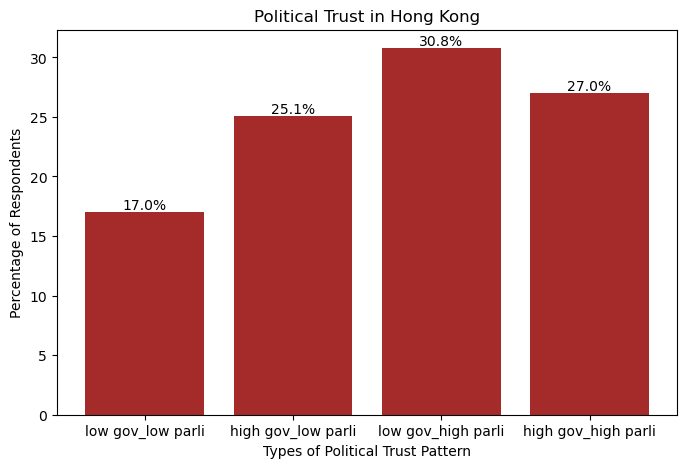

In [34]:
# Create a dictionary to map values to their corresponding meanings

mapping2 = {1: 'low gov_low parli', 0: 'high gov_low parli', 
           3: 'low gov_high parli', 2: 'high gov_high parli'}
order2 = ['low gov_low parli', 'high gov_low parli', 
         'low gov_high parli', 'high gov_high parli']

# Replace values in the 'Cluster' column
HK2 = trust_HK['Cluster'].replace(mapping2)

# Get value counts and percentages
value_counts_HK2 = HK2.value_counts()
percentages_HK2 = round(value_counts_HK2 / len(HK2) * 100, 1)

# Ensure the order is consistent and missing categories are filled with 0
percentages_HK2 = percentages_HK2.reindex(order2, fill_value=0)

# Create figure and axis
fig, axs = plt.subplots(1, 1, figsize=(8, 5))  # Ensure axs is defined

# Plot bar chart
axs.bar(order2, percentages_HK2, color='brown')

# Set labels and title
axs.set_title('Political Trust in Hong Kong')
axs.set_xlabel('Types of Political Trust Pattern')
axs.set_ylabel('Percentage of Respondents')

# Add percentage labels to bars
axs.bar_label(axs.containers[0], labels=percentages_HK2.astype(str) + '%', label_type='edge')

# Show the plot
plt.show()

### The end of the session!